<a href="https://colab.research.google.com/github/AkshatJawne/FlightFarePrediction/blob/main/FlightPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

**Data Exploration**


In [89]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [90]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [91]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [92]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [93]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [94]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [95]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [96]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [97]:
df['duration'].min()

0.83

In [98]:
df['duration'].max()

49.83

In [99]:
df['duration'].median()

11.25

**Preprocessing**

In [100]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

# Binary Encoding
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [101]:
df.stops = pd.factorize(df.stops)[0]

In [102]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [103]:
#One hot encoding
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype='int')).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype='int')).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination', dtype='int')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype='int')).drop('departure_time',axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype='int')).drop('arrival_time',axis=1)

In [104]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [105]:
# Converting price from INR to CAD
df.price = df.price.apply(lambda x: x / 60)

In [106]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,99.216667,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,99.216667,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,99.266667,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,99.250000,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,99.250000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,1154.416667,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,1285.083333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,1318.316667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,1359.750000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Training Regression Model**

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [109]:
#20% of data is for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

**Evaluating Model**

In [112]:
#Determing r squared (determination of coefficient)
reg.score(X_test, y_test)

0.984581430851803

In [113]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, y_pred)))



R^2:  0.984581430851803
Mean Absolute Error:  18.22622724310283
Mean Squared Error:  2215.867681359924
Root Mean Squared Error:  47.07300374269656


Text(0.5, 1.0, 'Prediction vs. Actual Price')

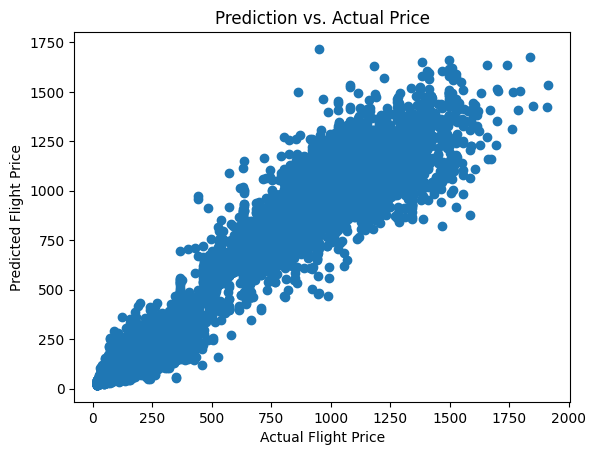

In [114]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs. Actual Price')

In [116]:
#Determining Important Pricing Features

importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.879735610753472),
 ('duration', 0.05776080641787011),
 ('days_left', 0.018662894409788758),
 ('airline_Air_India', 0.009426161962884637),
 ('source_Delhi', 0.003612920641477886),
 ('destination_Delhi', 0.00331832610623074),
 ('source_Mumbai', 0.0021806913714342326),
 ('destination_Mumbai', 0.0019878412577236113),
 ('destination_Kolkata', 0.0017911603911584654),
 ('source_Kolkata', 0.0017286307058962786),
 ('stops', 0.0017091488760882763),
 ('destination_Hyderabad', 0.0016016258802418503),
 ('arrival_Evening', 0.001492943716559652),
 ('source_Hyderabad', 0.0013753253919939886),
 ('destination_Bangalore', 0.001291013699342239),
 ('arrival_Night', 0.0011718611435923229),
 ('source_Bangalore', 0.0011242835850913278),
 ('departure_Evening', 0.0010794652982208822),
 ('arrival_Afternoon', 0.000981838757982627),
 ('source_Chennai', 0.0009329393842925633),
 ('departure_Morning', 0.0008877868763979049),
 ('departure_Afternoon', 0.0008693650882070313),
 ('destination_Chennai', 0.0008

<BarContainer object of 10 artists>

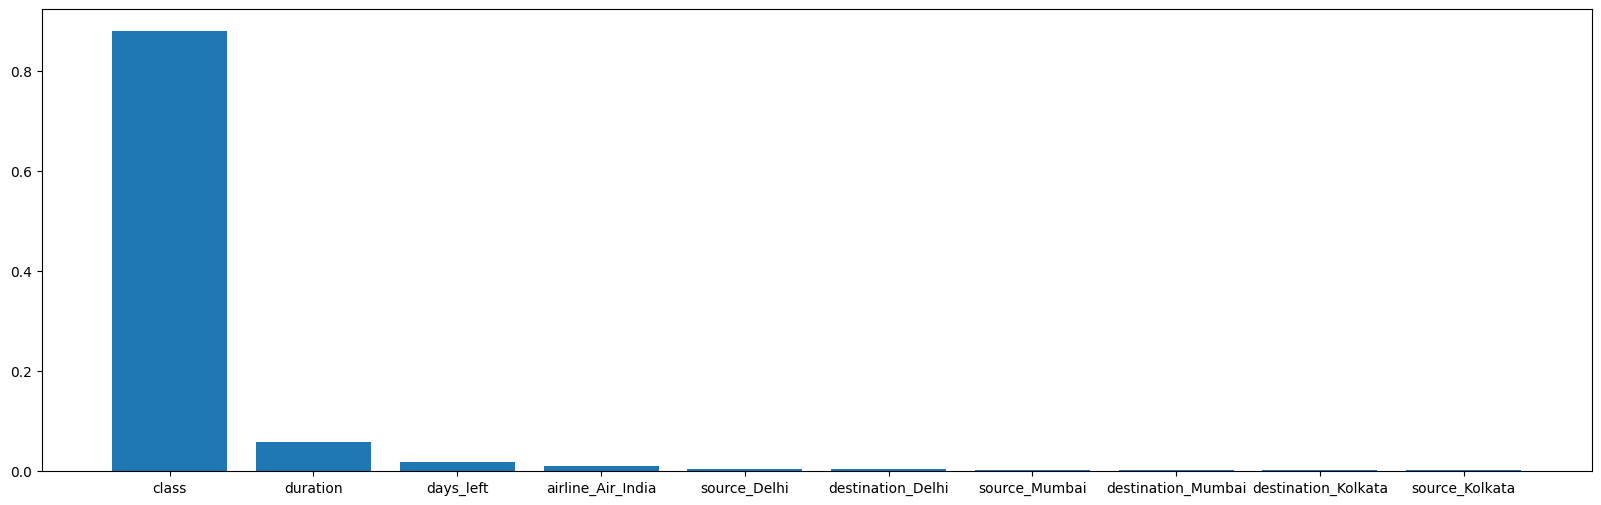

In [120]:
plt.figure(figsize=(20,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
#Alternate method, would take immense processing time and power
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [122]:
best_regressor.score(X_train, y_train)

0.9946821037721844

In [123]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R^2:  0.9855994326277643
Mean Absolute Error:  18.47977477656153
Mean Squared Error:  2069.5663473490904
Root Mean Squared Error:  45.492486713182544


Text(0.5, 1.0, 'Prediction vs. Actual Price')

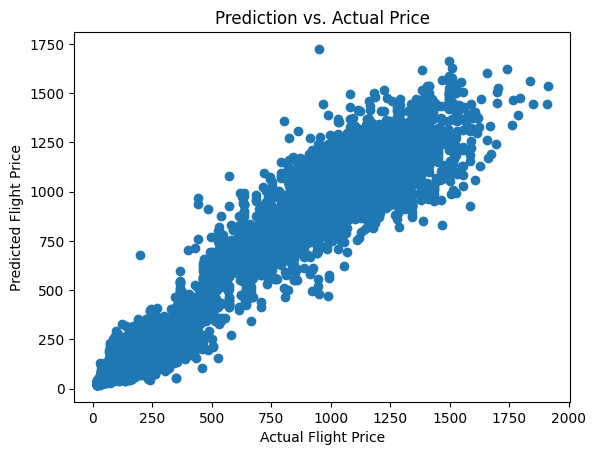

In [124]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs. Actual Price')